## Setup

In [2]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)
sns.set_style("whitegrid")
numpy.random.seed(7)

## Load Data
This section remains here for reference about the feature engineering that took place in the original research.
In this GitHub published version the machine learning process starts with the already anonymized and prepared dataset that resides in file "data.csv" 

In [1]:
# data = pandas.read_csv('elpis2.csv',  sep=";", encoding='iso8859_7')
# data = data[:130000]

In [3]:
# data.rename(columns = {
#     'TMP_AGE':'AGE',
#     'TMP_PNUR_RESULT':'OUTCOME',
#     'TMP_REINSERT_DATES':'READMISSION_DAYS',
#     'TMP_SEX_CD':'SEX'
# }, inplace=True)

# data = data[data['AGE'] >= 0]
# data = data[data['AGE'] <= 120]
# data = data[data['TMP_OPAT_ID'] != 161]
# data = data[data['TMP_OPAT_ID'] != 695]
# data = data[data['TMP_OPAT_ID'] != 91582]
# data = data[data['OUTCOME'] != 'Θάνατος']
# data['OUTCOME'].replace(
# ['Βελτίωση', 'Αμετάβλητη', 'Ίαση', 'Επιδείνωση'],
#     ['I', 'N', 'H', 'D'], inplace=True
# )

# f, (ax1, ax2, ax3) = plt.subplots(1, 3)
# #f.suptitle('Categorical Features')

# sex_count = data.groupby('SEX').size().sort_values(ascending=False)
# print(sex_count)
# sex_count.plot(kind='bar', ax=ax1)
# #plt.show()
# data = data.join(pandas.get_dummies(data['SEX'], prefix='SEX'))
# #data.drop('TMP_SEX_CD', axis=1, inplace=True)

# outcome_count = data.groupby('OUTCOME').size().sort_values(ascending=False)
# print(outcome_count)
# outcome_count.plot(kind='bar', ax=ax2)
# #plt.show()
# data = data.join(pandas.get_dummies(data['OUTCOME'], prefix='OUTCOME'))
# #data.drop('TMP_PNUR_RESULT', axis=1, inplace=True)

# data['READMISSION_DAYS'].replace([0],9999, True)
# column_name = 'READMISSION_DAYS'
# mask = data['READMISSION_DAYS'] <= 30
# data.loc[mask, column_name] = 1
# mask = data['READMISSION_DAYS'] > 30
# data.loc[mask, column_name] = 0
# data.rename(columns = {
#     'READMISSION_DAYS':'READMISSION_30_DAYS'}, inplace=True)
# readmission_count = data.groupby('READMISSION_30_DAYS').size().sort_values(ascending=False)
# print(readmission_count)
# readmission_count.plot(kind='bar', ax=ax3)
# plt.figure(figsize=(20,20))
# plt.show()

In [4]:
# data.rename(columns = {
#     'TMP_PNUR_DATES':'CURADM_DAYS',
#     'TMP_PREV_PNUR':'PREVADM_NO',
#     'TMP_PREV_PNUR_DATES':'PREVADM_DAYS',
#     'TMP_METH':'CURRICU_FLAG',
#     'TMP_PREV_PNUR_METH_DATES':'PREVICU_DAYS',
# }, inplace=True)

# data = data[['AGE',
#              'SEX_F',
#              'SEX_M',
#              'CURADM_DAYS', 
#              'OUTCOME_H',
#              'OUTCOME_N',
#              'OUTCOME_I',
#              'OUTCOME_D',
#              'CURRICU_FLAG',
#              'PREVADM_NO',
#              'PREVADM_DAYS',
#              'PREVICU_DAYS',
#              'READMISSION_30_DAYS']]

# data.head(10)

In [5]:
# data.to_csv('data.csv')
data = pandas.read_csv('data.csv', index_col=[0])
data.head()

,AGE,SEX_F,SEX_M,CURADM_DAYS,OUTCOME_H,OUTCOME_N,OUTCOME_I,OUTCOME_D,CURRICU_FLAG,PREVADM_NO,PREVADM_DAYS,PREVICU_DAYS,READMISSION_30_DAYS
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


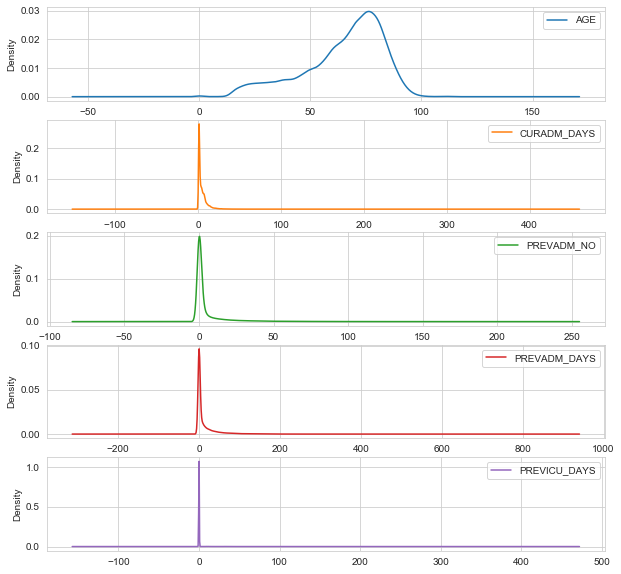

In [6]:
data[['AGE','CURADM_DAYS','PREVADM_NO', 'PREVADM_DAYS', 'PREVICU_DAYS']].plot(kind='density', subplots=True, layout=(5,1), sharex=False, figsize=(10,10))

plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.metrics import classification_report

Using Theano backend.


In [8]:
zero_indices = data[data['READMISSION_30_DAYS'] == 0].index

sample_size_to_remove = sum(data['READMISSION_30_DAYS'] == 0) - sum(data['READMISSION_30_DAYS'] == 1)
random_indices = numpy.random.choice(zero_indices, sample_size_to_remove, replace=False)
data = data.drop(random_indices)
print(len(data))
readmission_count = data.groupby('READMISSION_30_DAYS').size().sort_values(ascending=False)
print(readmission_count)

44384
READMISSION_30_DAYS
1    22192
0    22192
dtype: int64


In [9]:
dataset = data.values
numpy.random.shuffle(dataset)
# split into input (X) and output (Y) variables
X = dataset[:,0:12].astype(float)
Y = dataset[:,12]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [10]:
test_size = 0.1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=7)

In [12]:
model = SVC()
model = KNeighborsClassifier()
model = GaussianNB()
model = LinearDiscriminantAnalysis()
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score

report = classification_report(Y_test, predicted)
print(report)

print(roc_auc_score(Y_test, predicted))
print(matthews_corrcoef(Y_test, predicted))

[[1866  423]
 [ 757 1393]]
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76      2289
         1.0       0.77      0.65      0.70      2150

    accuracy                           0.73      4439
   macro avg       0.74      0.73      0.73      4439
weighted avg       0.74      0.73      0.73      4439

0.7315550611112804
0.4707272417951753


In [13]:
from math import floor
def partition(vector, fold, k):

    size = vector.shape[0]

    start = floor((size/k)*fold)

    end = floor((size/k)*(fold+1))

    validation = vector[start:end]
    
    #print(str(type(vector)))

    if str(type(vector)) == "<class 'scipy.sparse.csr.csr_matrix'>":

        indices = range(start, end)

        mask = numpy.ones(vector.shape[0], dtype=bool)

        mask[indices] = False

        training = vector[mask]

    elif str(type(vector)) == "<class 'numpy.ndarray'>":
        
        training = numpy.concatenate((vector[:start], vector[end:]))

    return training, validation



def Cross_Validation(learner, k, examples, labels):

    train_folds_score = []

    validation_folds_score = []
    
    test_score_auc = []
    
    test_score_mcc = []

    for fold in range(0, k):

        training_set, validation_set = partition(examples, fold, k)

        training_labels, validation_labels = partition(labels, fold, k)

        learner.fit(training_set, training_labels)

        training_predicted = learner.predict(training_set)

        validation_predicted = learner.predict(validation_set)
        
        test_predicted = learner.predict(X_test)

        train_folds_score.append(roc_auc_score(training_labels, training_predicted))

        validation_folds_score.append(roc_auc_score(validation_labels, validation_predicted))
        
        test_score_auc.append(roc_auc_score(Y_test, test_predicted))
        
        test_score_mcc.append(matthews_corrcoef(Y_test, test_predicted))

    return train_folds_score, validation_folds_score, test_score_auc, test_score_mcc

In [14]:
def run(model) :
    train_scores, validation_scores, test_scores_auc, test_scores_mcc = Cross_Validation(model, 10, X_test, Y_test)
    #print(train_scores, validation_scores, test_scores)
    print(model)
    print('Train AUC', float(format(numpy.mean(train_scores), '.3f')))
    print('Validation AUC',float(format(numpy.mean(validation_scores), '.3f')))
    print('Test AUC',float(format(numpy.mean(test_scores_auc), '.3f')))
    print('Test MCC',float(format(numpy.mean(test_scores_mcc), '.3f')))
    print()
    

In [15]:
%%time
models = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), SVC()]
for model in models:
    run(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Train AUC 0.723
Validation AUC 0.723
Test AUC 0.723
Test MCC 0.456

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Train AUC 0.793
Validation AUC 0.712
Test AUC 0.785
Test MCC 0.57

GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC 0.708
Validation AUC 0.708
Test AUC 0.708
Test MCC 0.431

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=12, verbose=1, validation_split=0.1)

Train on 35950 samples, validate on 3995 samples
Epoch 1/100
35950/35950 [==============================] - 8s 231us/step - loss: 0.5752 - accuracy: 0.7245 - val_loss: 0.5642 - val_accuracy: 0.7344
Epoch 2/100
35950/35950 [==============================] - 10s 287us/step - loss: 0.5618 - accuracy: 0.7383 - val_loss: 0.5557 - val_accuracy: 0.7392
Epoch 3/100
35950/35950 [==============================] - 13s 373us/step - loss: 0.5588 - accuracy: 0.7392 - val_loss: 0.5513 - val_accuracy: 0.7422
Epoch 4/100
35950/35950 [==============================] - 13s 354us/step - loss: 0.5557 - accuracy: 0.7402 - val_loss: 0.5594 - val_accuracy: 0.7357
Epoch 5/100
35950/35950 [==============================] - 13s 366us/step - loss: 0.5543 - accuracy: 0.7408 - val_loss: 0.5501 - val_accuracy: 0.7417
Epoch 6/100
35950/35950 [==============================] - 14s 395us/step - loss: 0.5532 - accuracy: 0.7413 - val_loss: 0.5507 - val_accuracy: 0.7412
Epoch 7/100
35950/35950 [===========================

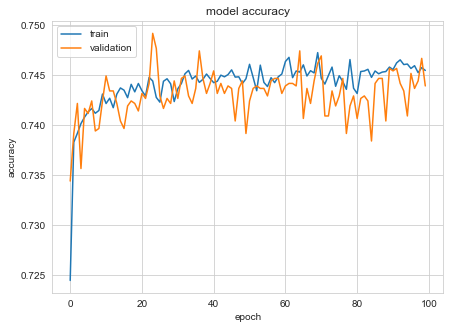

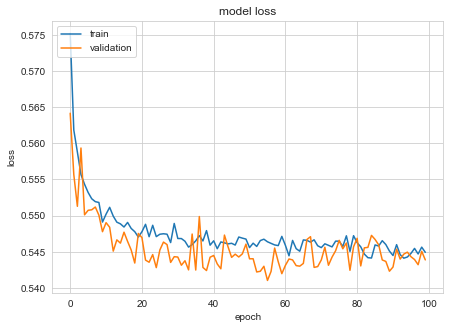

In [29]:
# summarize history for accuracy
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
predicted = model.predict_classes(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

report = classification_report(Y_test, predicted)
print(report)

print(roc_auc_score(Y_test, predicted))

print(matthews_corrcoef(Y_test, predicted))

[[1814  475]
 [ 636 1514]]
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.77      2289
         1.0       0.76      0.70      0.73      2150

    accuracy                           0.75      4439
   macro avg       0.75      0.75      0.75      4439
weighted avg       0.75      0.75      0.75      4439

0.7483359240858707
0.49912719951640805


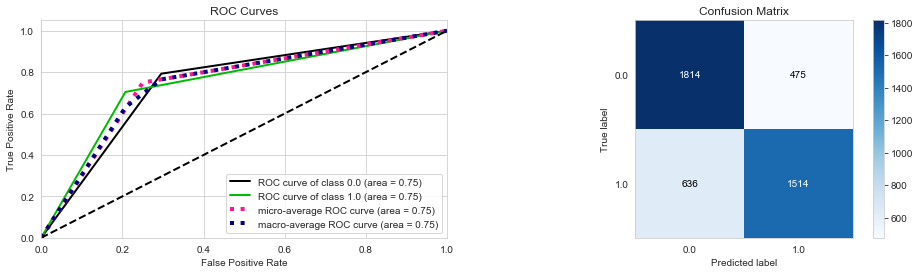

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2)
#f.suptitle('NN Performance')

# skplt.metrics.plot_roc_curve(Y_test, numpy.concatenate((1-predicted,predicted),axis=1), ax=ax1)
#plt.show()

skplt.metrics.plot_roc(Y_test, numpy.concatenate((1-predicted,predicted),axis=1), ax=ax1)
#plt.show()

skplt.metrics.plot_confusion_matrix(Y_test, predicted, ax=ax2)
#plt.show()

#skplt.metrics.plot_precision_recall_curve(Y_test, numpy.concatenate((1-predicted,predicted),axis=1), ax=ax3)
plt.show()

# plt.figure(figsize=(10,10))
# skplt.metrics.plot_roc_curve(Y_test, numpy.concatenate((1-predicted,predicted),axis=1), figsize=(7,4))
# plt.show()

In [22]:
print (model)